### 1. Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 2. Przygotowanie danych do analizy

In [2]:
os.getcwd()

'C:\\Users\\Elix\\Documents\\AUTOML_Projekt'

In [3]:
base_data = pd.read_csv("heart.csv");
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych

cols = ["HeartDisease","Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope",]
data = base_data[cols].copy()
# tworzymy kopię naszych danych bez zbędnych kolumn

In [4]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

HeartDisease      False
Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
dtype: bool

#### Możemy wygenerować mapę ciepła symbolizującą braki danych - każdy "pomarańczowy pasek" to miejsce, w którym jest brak danych

<AxesSubplot:>

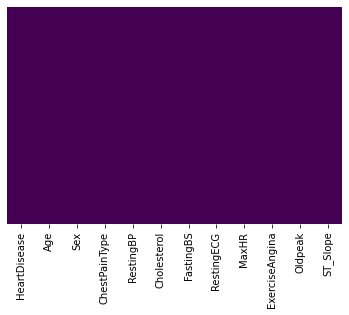

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# cbar ustalamy jako false, ponieważ nie wniesie nam to dodatkowych informacji

#### Zanim przejdziemy dalej musimy jeszcze zadbać o właściwe nazewnictwo zmiennych. W naszej bazie danych mamy na razie informację w postaci Stringów - np. płeć jest oznaczona jako male lub female. Musimy to naprawić za pomocą "dumy variable". Zamienimy je automatycznie na wartości np. 1 będzie dla mężczyzn. Przczytaj o tym więcej: https://pl.wikipedia.org/wiki/Dummy_coding

In [6]:
encoder = LabelEncoder()
data.loc[:,"Sex"] = encoder.fit_transform(data.loc[:,"Sex"])
# F = 0, M = 1

encoder = LabelEncoder()
data.loc[:,"ChestPainType"] = encoder.fit_transform(data.loc[:,"ChestPainType"])
# ASY = 0, ATA = 1, NAP = 2, TA = 3

encoder = LabelEncoder()
data.loc[:,"RestingECG"] = encoder.fit_transform(data.loc[:,"RestingECG"])
# LVH = 0, Normal = 1, ST = 2

encoder = LabelEncoder()
data.loc[:,"ExerciseAngina"] = encoder.fit_transform(data.loc[:,"ExerciseAngina"])
# N = 0, Y = 1

encoder = LabelEncoder()
data.loc[:,"ST_Slope"] = encoder.fit_transform(data.loc[:,"ST_Slope"])
# Down = 0, Flat = 1, Up = 2

3. Eksploracja danych

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

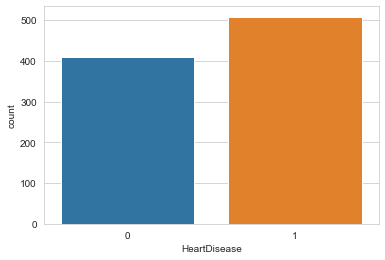

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=data)
# używamy biblioteki seaborn do stworzenia prostego wykresu symbolizującego osoby, które przeżyły (1) i nie przeżyły (0)

<AxesSubplot:xlabel='Sex', ylabel='count'>

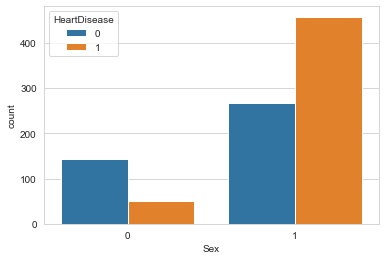

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='HeartDisease',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

<AxesSubplot:xlabel='ChestPainType', ylabel='Age'>

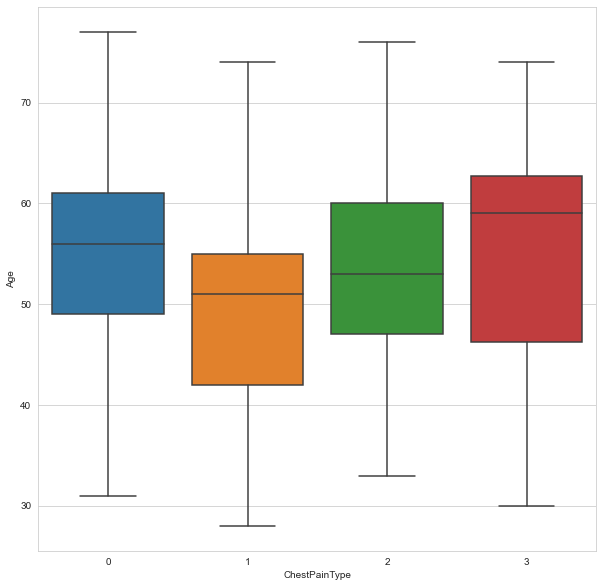

In [9]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='ChestPainType',y='Age',data=data)
# wygenerujemy sobie boxplot, czyli wykres skrzynkowy dla wieku oraz klasy pasażerów

### 4. Trenowanie modelu

In [10]:
y = data.iloc[:,0] # survived - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,1:12] # zmienne na podstawie, których chcemy przewidzieć
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu

In [11]:
def model(X_train, y_train):
    
    forest = RandomForestClassifier( n_estimators=10, random_state=0)
    forest.fit(X_train,y_train)
    print("Las: {0}".format(forest.score(X_train,y_train)) )
    
    lreg =LogisticRegression(max_iter=1000)
    lreg.fit(X_train,y_train)
    print("Regresja logistyczna: {0}".format(lreg.score(X_train,y_train)) )
  
    tree =DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    print("Drzewa decyzyjne: {0}".format(tree.score(X_train,y_train)) )
   
    return forest, lreg, tree

forest, lreg, tree = model(X_train,y_train)

Las: 0.997275204359673
Regresja logistyczna: 0.8596730245231607
Drzewa decyzyjne: 1.0


In [12]:
target_names=["HeartDisease","Normal"]

y1_predict = forest.predict(X_test)
print("Random Forest {0}".format(accuracy_score(y_test, y1_predict)))

y2_predict = lreg.predict(X_test)
print("Logistic Regresion {0}".format(accuracy_score(y_test, y2_predict)))

y3_predict = tree.predict(X_test)
print("Decision Tree {0}".format(accuracy_score(y_test, y3_predict)))

# uzyskujemy dzięki temu informacje dotyczącą dokładności modelu 

Random Forest 0.8586956521739131
Logistic Regresion 0.8369565217391305
Decision Tree 0.75


In [14]:
print("Ocena modelu 1. Las")
print(classification_report(y_test,y1_predict))
# uzyskujemy informację o precyzji, recall, f1, etc.
# te wszystkie dane przydadzą się nam do oceny naszego modelu

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



print("Ocena modelu 1. Regresja logistyczna")
print(classification_report(y_test,y2_predict))

In [15]:
print("Ocena modelu 3. Drzewa decyzyjne")
print(classification_report(y_test,y3_predict))

Ocena modelu 3. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        77
           1       0.84      0.71      0.77       107

    accuracy                           0.75       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.75      0.75       184



In [16]:
print("Ocena modelu 2. Logistic regression")
print(classification_report(y_test,y2_predict))

Ocena modelu 2. Logistic regression
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



### 5. Eksport modelu

#### Widzimy, że najlepszymi parametrami cechuje się model pierwszy. Eksportujemy go do pickle.

In [31]:
filename = "model.sv"
pickle.dump(forest, open(filename,'wb'))

##### Źródło danych [https://www.kaggle.com/c/titanic/](https://www.kaggle.com/c/titanic), zastosowanie przez Adama Ramblinga